# DISEASE ANNOTATIONS
#### matrix > tsne3D > cluster > 3D portrait

In [1]:
from multidimvis_main import *

In [2]:
G = nx.read_edgelist('input/ppi_elist.txt',data=False)

d_gene_do = pickle.load( open( "input/d_gene_do.pkl", "rb" ) )
d_do_genes = pickle.load( open( "input/d_do_genes.pkl", "rb" ) )
d_do_names = pickle.load( open( "input/DO_names.pkl", "rb" ) )
d_names_do = {y:x for x,y in d_do_names.items()}

In [3]:
DM_Disease = pd.read_csv('output_csv/DistanceMatrix_Disease_Dataframe_Human.csv', index_col=0)

In [4]:
# precalculated import
df_centralities = pd.read_csv('output_csv/Features_centralities_Dataframe_Human.csv', index_col=0)

d_deghubs = dict(zip(G.nodes(),df_centralities['degs']))
d_clos = dict(zip(G.nodes(), df_centralities['clos']))
d_betw = dict(zip(G.nodes(), df_centralities['betw']))
d_eigen = dict(zip(G.nodes(), df_centralities['eigen']))

d_centralities = dict(zip(list(G.nodes),zip(d_deghubs.values(),d_clos.values(),d_betw.values(),d_eigen.values())))
l_features = []
for i in d_centralities.items():
    k=list(i)
    l_features.append(k)
    
DM_centralities = pd.DataFrame(distance.squareform(distance.pdist(df_centralities, 'euclidean')))

In [5]:
DM_Disease

,389289,4524,4353,27127,5925,10735,26259,1029,9649,1630,...,65125,6787,90678,10661,56479,63910,7287,11173,9962,5973
389289,0.000000,14.730920,9.380832,0.000000,10.908712,3.605551,0.000000,12.489996,0.000000,6.244998,...,5.291503,3.000000,8.602325,4.358899,3.464102,3.162278,8.717798,3.464102,3.316625,6.928203
4524,14.730920,0.000000,13.152946,14.730920,15.811388,14.696938,14.730920,16.941074,14.730920,15.165751,...,14.798649,14.764823,16.881943,15.033296,14.798649,14.798649,15.905974,14.730920,14.899664,16.093477
4353,9.380832,13.152946,0.000000,9.380832,12.845233,10.049876,9.380832,14.282857,9.380832,10.816654,...,9.695360,9.539392,12.569805,10.148892,9.797959,9.486833,12.165525,9.591663,9.643651,11.401754
27127,0.000000,14.730920,9.380832,0.000000,10.908712,3.605551,0.000000,12.489996,0.000000,6.244998,...,5.291503,3.000000,8.602325,4.358899,3.464102,3.162278,8.717798,3.464102,3.316625,6.928203
5925,10.908712,15.811388,12.845233,10.908712,0.000000,10.770330,10.908712,12.922848,10.908712,11.832160,...,11.789826,11.224972,13.747727,11.575837,11.000000,11.000000,13.076697,11.180340,11.313708,12.767145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63910,3.162278,14.798649,9.486833,3.162278,11.000000,4.795832,3.162278,12.649111,3.162278,7.000000,...,5.099020,3.000000,8.485281,4.123106,3.162278,0.000000,8.602325,3.162278,3.000000,6.782330
7287,8.717798,15.905974,12.165525,8.717798,13.076697,9.433981,8.717798,14.628739,8.717798,10.630146,...,9.273618,8.544004,11.489125,9.110434,8.000000,8.602325,0.000000,8.602325,8.660254,10.583005
11173,3.464102,14.730920,9.591663,3.464102,11.180340,5.000000,3.464102,12.884099,3.464102,7.141428,...,4.690416,3.316625,8.602325,4.358899,3.464102,3.162278,8.602325,0.000000,3.316625,6.782330
9962,3.316625,14.899664,9.643651,3.316625,11.313708,4.898979,3.316625,12.767145,3.316625,7.071068,...,5.196152,3.162278,8.544004,4.242641,3.316625,3.000000,8.660254,3.316625,0.000000,6.855655


In [1]:
DM_Disease_round = DM_Disease.round(2)

NameError: name 'DM_Disease' is not defined

________
### 3D tSNE

In [6]:
prplxty3d = 50 # range: 5-50 / default = 30.#
density3d = 1.2 # default 12.
l_rate3d = 200 # default 200.
steps3d = 250 #min 250

metric = 'correlation'
#metric = 'cosine'

In [7]:
feature = 'disease'
DM = DM_Disease
l_genes = list(DM_Disease.index)
l_features = l_genes

In [8]:
%%time 
tsne = embed_tsne_3D(DM,  prplxty3d, density3d, l_rate3d, steps3d, metric)

CPU times: user 4min 31s, sys: 14.1 s, total: 4min 45s
Wall time: 2min 56s


In [9]:
%%time 
posG = get_posG_3D_(l_genes, tsne)

df_xyz_portrait_tsne = pd.DataFrame(posG, index=["x","y","z"]).T
df_xyz_portrait_tsne.to_csv(r'output_csv/3Dportrait_tsne_XYZ_'+feature+'_Human.csv', index = True)

CPU times: user 1.09 s, sys: 231 ms, total: 1.32 s
Wall time: 461 ms


In [12]:
scalef= 5
d_node_size = d_deghubs
size3d = draw_node_size(G, d_node_size, scalef)

edge_color = 'grey'
edge_width = 0.1

opacity_nodes = 1
opacity_edges = 0.3

### CLUSTER

In [285]:
df_posG = pd.DataFrame(posG).T

n_clus = 50
n_iterations = 50

d_node_clusterid = get_node_clusterid(df_posG, n_clus, n_iterations)
cluster_center_x, cluster_center_y, cluster_center_z = get_clustercenter_xyz(df_posG, n_clus, n_iterations)

colours = color_nodes_from_dict(G, d_node_clusterid)

trace_centers = pgo.Scatter3d(x = cluster_center_x,
                             y = cluster_center_y,
                             z = cluster_center_z,
                                 mode = 'markers',
                                 marker=dict(
                                    size=3,
                                    color='lightgrey',
                                    opacity=1)
                                 )

### GENE > DISEASE : RANKING

In [286]:
# bin genes with same clusterid

d_bin_by_cluster = {}
for key, value in d_node_clusterid.items():
    d_bin_by_cluster.setdefault(value, set()).add(key)

# get diseases of genes in same cluster
d_clusterid_doids = {}
for clus,nodes in d_bin_by_cluster.items():
    l = []
    for n in nodes:
        for gene,doids in d_gene_do.items():
            if gene == str(n):
                l.append(doids)
    d_clusterid_doids[clus] = list(itertools.chain(*l))
    
d_clusterid_disease_count = {}
for clus,do in d_clusterid_doids.items():
    d_clusterid_disease_count[clus] = dict(Counter(do))

In [287]:
d_ranked = {}
for clus, d_doids in d_clusterid_disease_count.items():
    sub = []
    for k,v in sorted(d_doids.items(), key = lambda x: x[1], reverse = True)[:10]:
        sub.append(k)
        sub.append(d_do_names[k])
    d_ranked[clus] = sub

In [288]:
annotat = []
for clus,item in d_ranked.items():
    annotat.append(item[1])

In [289]:
annotations = [dict(
                x=xi,
                y=yi,
                z=zi,
                showarrow=True,
                text=annotat[i],
                xanchor="right",
                ay=-100,
                ax=-100,
                opacity=0.8,
                arrowhead=0,
                arrowwidth=0.5,
                arrowcolor="white"
                ) for i, xi, yi, zi in zip(range(0,n_clus), cluster_center_x,cluster_center_y,cluster_center_z)]

In [290]:
tsne_nodes = get_trace_nodes_(posG, l_features, colours, size3d)

# tsne_data = [tsne_edges, tsne_nodes]
# tsne_data = [tsne_nodes, trace_centers]

tsne_data = [tsne_nodes]

Perplexity: 50
Early Exaggeration: 1.2
Learning rate: 200
Iterations: 250


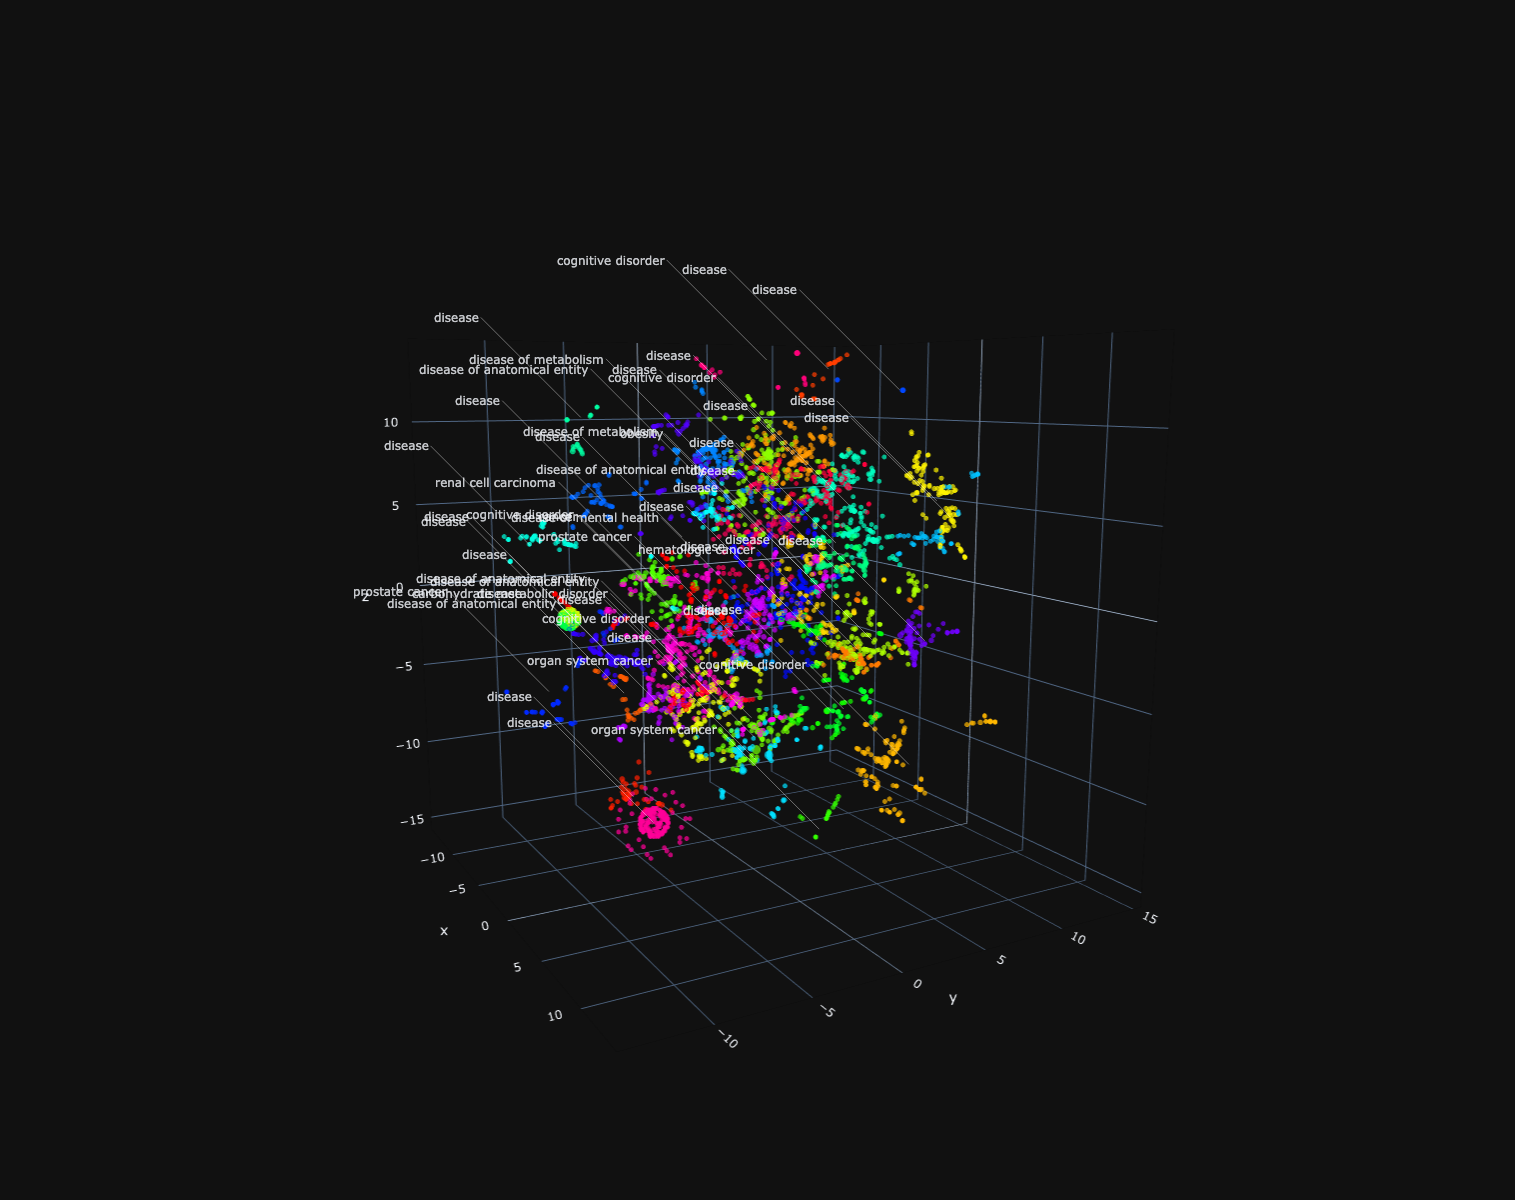

'output_plots/3Dportrait_tsne_disease_correlation_Human.html'

In [291]:
print('Perplexity:', prplxty3d)
print('Early Exaggeration:', density3d)
print('Learning rate:', l_rate3d)
print('Iterations:', steps3d)

fig = pgo.Figure()
for i in tsne_data:
    fig.add_trace(i)
fig.update_layout(template='plotly_dark', showlegend=False, width=1200, height=1200,
                  scene=dict(
                    aspectratio=dict(
                        x=1,
                        y=1,
                        z=1
                    ),
                    camera=dict(
                        center=dict(
                            x=0,
                            y=0,
                            z=0
                        ),
                        eye=dict(
                            x=1.96903462608,
                            y=-1.09022831971,
                            z=0.405345349304
                        ),
                        up=dict(
                            x=0,
                            y=0,
                            z=1
                        )
                    ),
                    dragmode="turntable",
                    annotations=annotations,
                ))
py.iplot(fig)

plotly.offline.plot(fig, filename = 'output_plots/3Dportrait_tsne_'+feature+'_'+metric+'_Human.html', auto_open=False)